# Homework 4 By Cheng Ye (cy2696)

## Step 2 Populate my Graph Database

In [2]:
#!pip install neo4j

In [3]:
#connecting to database
from neo4j import GraphDatabase

database_name = "neo4j"
username = "neo4j"
password = "apan5400"
uri = "bolt://localhost:7687/" + database_name

driver = GraphDatabase.driver(uri, auth=(username, password))
session = driver.session()

print("Successfully connected to Neo4j!")

Successfully connected to Neo4j!


Establish feasible node relationships,Create Headquartered_in relation between city and country

In [4]:
import os
import urllib
datapath = os.path.abspath("C:/Users/yeche/Downloads/companies.csv")

query111 = ("LOAD CSV WITH HEADERS FROM 'file:///{0}' AS line".format(datapath)           
+ """
CREATE (company:Company { \
                       name: line.company, \
                  employees: toInteger(line.employees),\
                       year: toInteger(line.founded), \
                    revenue: toFloat(line.revenue) \
                            } \
            )
MERGE  (country:Country {name: line.country})
CREATE (company)-[:HEADQUARTERED_IN]->(country)
"""
    )

result111 = session.run(query111)

### Establish node relationships that may be necessary to answer the questions in Step 3:
#### company--> city --> state --> country
#### company--> founded year
#### company--> number of employees
#### company--> revenue

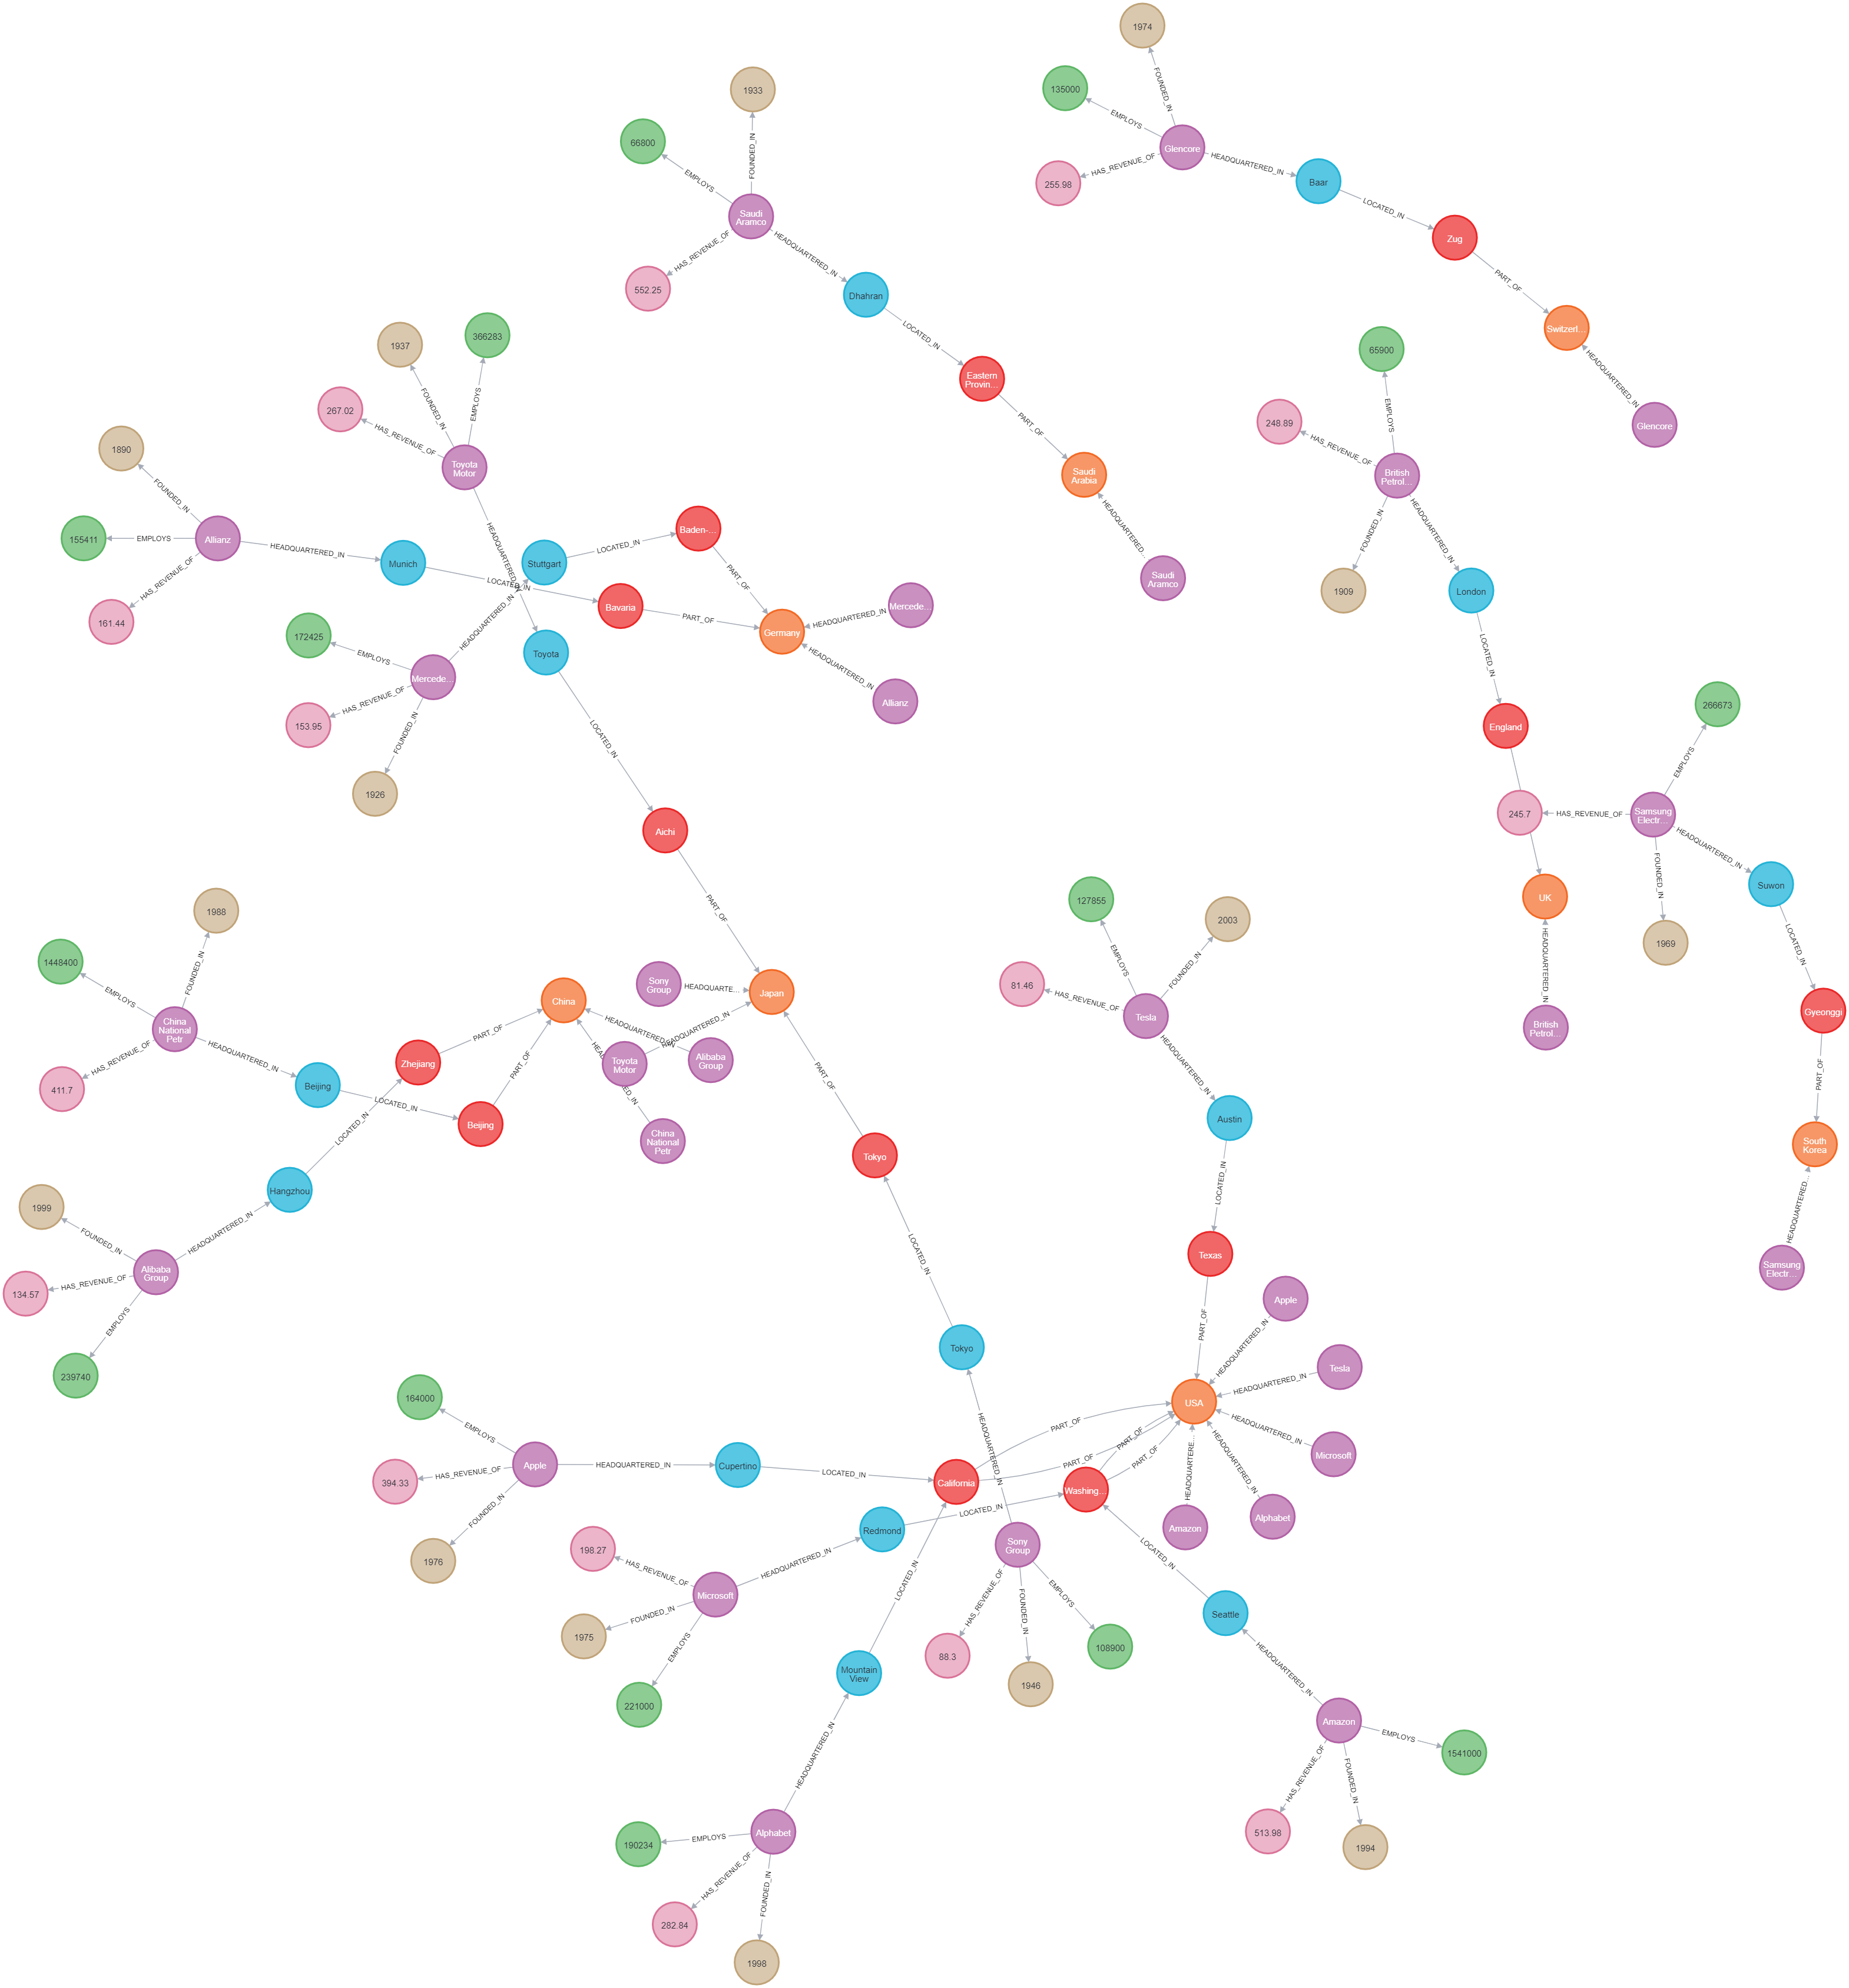

## Step 3 - Build and run Python Cypher queries against the Neo4j Database to answer the following questions:

In [5]:
import os
import urllib
datapath = os.path.abspath("C:/Users/yeche/Downloads/companies.csv")
print("file:///{0}".format(datapath))

query12 = (
"LOAD CSV WITH HEADERS FROM 'file:///{0}' AS line with line where line.state is not null".format(datapath)   
+ """
CREATE (company:Company { \
                       name: line.company, \
                  employees: toInteger(line.employees),\
                       year: toInteger(line.founded), \
                    revenue: toFloat(line.revenue) \
                            } \
            )
MERGE  (city:City {name: line.city})
MERGE  (state:State {name: line.state})
MERGE  (country:Country {name: line.country}) 
MERGE  (year:year {name: line.founded}) 
MERGE  (employees:employees {name: line.employees}) 
MERGE  (revenue:revenue {name: line.revenue}) 
CREATE (company)-[:HEADQUARTERED_IN]->(city)
CREATE (city)-[:LOCATED_IN]->(state)
CREATE (state)-[:PART_OF]->(country)
CREATE (company)-[:FOUNDED_IN]->(year)
CREATE (company)-[:EMPLOYS]->(employees)
CREATE (company)-[:HAS_REVENUE_OF]->(revenue)
"""
    )

""" """

result11 = session.run(query12)
print("All companies are imported from a csv file!")

file:///C:\Users\yeche\Downloads\companies.csv
All companies are imported from a csv file!


Question 1: Which companies are located in the state of California (via 2nd degree relation)?

In [6]:
companies_ca = ("MATCH (state:State {name: 'California'})<-[*2]-(company:Company) "
            "RETURN DISTINCT company.name as companies")
answer_1 = session.run(companies_ca)   
print('The companies that are located in California are: ')
[record["companies"] for record in answer_1]

The companies that are located in California are: 


['Apple', 'Alphabet']

Question 2: Which companies have been founded in the last quarter of the 20th century [1975-2000]? 

In [7]:
last_quarter_found = (
    "MATCH (n) WHERE n.year >= 1975 AND n.year <= 2000 RETURN *"
)

answer_2 = session.run(last_quarter_found)
result = []

print("The following companies are founded in the last quarter of the 20th century [1975-2000]:")
for record in answer_2:
    a = record[0]["name"]
    year = record[0]['year']
    if a not in result:
        result.append(a)
        print(a + " founded in: " + str(year))


The following companies are founded in the last quarter of the 20th century [1975-2000]:
Apple founded in: 1976
Microsoft founded in: 1975
Amazon founded in: 1994
Alphabet founded in: 1998
Alibaba Group founded in: 1999
China National Petroleum Corporation founded in: 1988


Question 3: What is the average annual revenue for all companies in the USA?

In [8]:
usa_avg_revenue = (
    "MATCH (company:Company)-[*1..3]-(country:Country {name: 'USA'}) "
    "WITH DISTINCT company "
    "RETURN round(avg(company.revenue), 10) as avgRevenue"
)

answer_3 = session.run(usa_avg_revenue)
result = [record["avgRevenue"] for record in answer_3]

if result:
    print("Average annual revenue for all companies in the USA is", result[0], "billion")

Average annual revenue for all companies in the USA is 294.176 billion


Question 4: Which companies are headquartered in Japan (via 3rd degree relation)?

In [9]:
Japan_companies = ("MATCH (country:Country {name: 'Japan'})-[*1..3]-(company:Company) \
          RETURN DISTINCT company.name as companies")
answer_4 = session.run(Japan_companies)   
print("The following companies are headquarted in Japan(via 3rd degree relation):")
for record in answer_4:
    print([record["companies"]])

The following companies are headquarted in Japan(via 3rd degree relation):
['Toyota Motor']
['Sony Group']


Question 5:What is the total number of employees of all companies in the USA and Germany (via 3rd degree relation)?

In [11]:
total_employees = ("""
MATCH (company:Company)-[*1..3]-(country:Country)
WHERE country.name IN ['USA','Germany']
WITH DISTINCT company
RETURN sum(company.employees) as total_employees
""")

answer_5 = session.run(total_employees)
result = []

for record in answer_5:
    a= record["total_employees"]
    if a not in result:
       result.append(a)
       print("Total number of employees in the USA and Germany:")
       print(a)

Total number of employees in the USA and Germany:
2571925


In [12]:
#Delete all nodes and relationships
delete = ("MATCH (n) OPTIONAL MATCH (n)-[r]-() DELETE n,r")
delete_all = session.run(delete)
print("All Nodes and relationships are deleted!")

All Nodes and relationships are deleted!
